<a href="https://colab.research.google.com/github/cbonnin88/Python_bootcamp/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown as gd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url ="https://drive.google.com/uc?id=1_XAFj-Or0XYuFhG2oTNPmwfW7Y_TVGTO"
gd.download(url,"HRIS23.csv",quiet=True)

hr_data = pd.read_csv("HRIS23.csv")

In [ ]:
hr_data.head()

,ID,Name,Surname,Age,Tenure,Gender,Region,Department,Manager,Hours,Salary Band,FTE Salary,Salary,Performance
0,21639,Susan,Gomez,32,2,Female,Northeast,Marketing,no,20,T4,118086,59043.0,bottom
1,4335,Matthew,Jones,62,22,Male,West,Sales,no,40,T3,109666,109666.0,top
2,1506,Nancy,Arias,42,2,Female,Northeast,Sales,no,40,T3,106311,106311.0,average
3,9699,Benjamin,Williams,34,5,Male,West,Customer Support,no,40,T3,122000,122000.0,top
4,8711,Melissa,Nicholson,32,7,Female,Southeast,Operations and production,no,20,T2,85000,42500.0,average


In [ ]:
hr_data.shape

(835, 14)

In [ ]:
print("The row count of this dataset is: {}".format(hr_data.shape[0]))

The row count of this dataset is: 835


In [ ]:
hr_data.columns

Index(['ID', 'Name', 'Surname', 'Age', 'Tenure', 'Gender', 'Region',
       'Department', 'Manager', 'Hours', 'Salary Band', 'FTE Salary', 'Salary',
       'Performance'],
      dtype='object')

In [ ]:
# The oldest employee:
hr_data.iloc[hr_data["Age"].idxmax()]

,420
ID,18564
Name,Peter
Surname,Morgan
Age,65
Tenure,26
Gender,Male
Region,Midwest
Department,Human Resources
Manager,yes
Hours,20


In [ ]:
# The Employee with the most Tenure:
hr_data.iloc[hr_data["Tenure"].idxmax()]

,156
ID,17322
Name,Christopher
Surname,Carlson
Age,63
Tenure,45
Gender,Male
Region,Midwest
Department,Operations and production
Manager,yes
Hours,24


In [ ]:
# Our youngest Employee:
hr_data.iloc[hr_data["Age"].idxmin()]

,401
ID,8915
Name,Genaro
Surname,Balderas
Age,19
Tenure,1
Gender,Male
Region,Southwest
Department,Human Resources
Manager,no
Hours,8


In [ ]:
# The Region with the most employees:
hr_data["Region"].value_counts().sort_values(ascending=False)

,count
Region,
West,197
Midwest,167
Southeast,161
Southwest,160
Northeast,150


In [ ]:
# the Gender ratio in our company:
hr_data["Gender"].value_counts().sort_values(ascending=False)

,count
Gender,
Male,460
Female,375


In [ ]:
# Average Salary within the company
avg_salary = hr_data["Salary"].mean()
print(f"The average salary is € {round(avg_salary,2)}")

The average salary is € 78159.08


In [ ]:
# Average age
avg_age = hr_data["Age"].mean()
print(f"The average age for our employees is {round(avg_age)} years old")

The average age for our employees is 42 years old


In [ ]:
# The average tenure
avg_tenure = hr_data["Tenure"].mean()
print(f"Our employees stay with the company on an average of {round(avg_tenure)} years")

Our employees stay with the company on an average of 12 years


**Cleaning the Data**

In [ ]:
# Checking for empty values
hr_data.isna().sum()

,0
ID,0
Name,0
Surname,0
Age,0
Tenure,0
Gender,0
Region,0
Department,0
Manager,0
Hours,0


In [ ]:
# Checking for duplicates
hr_data.duplicated().sum()

np.int64(0)

**Data Viz**

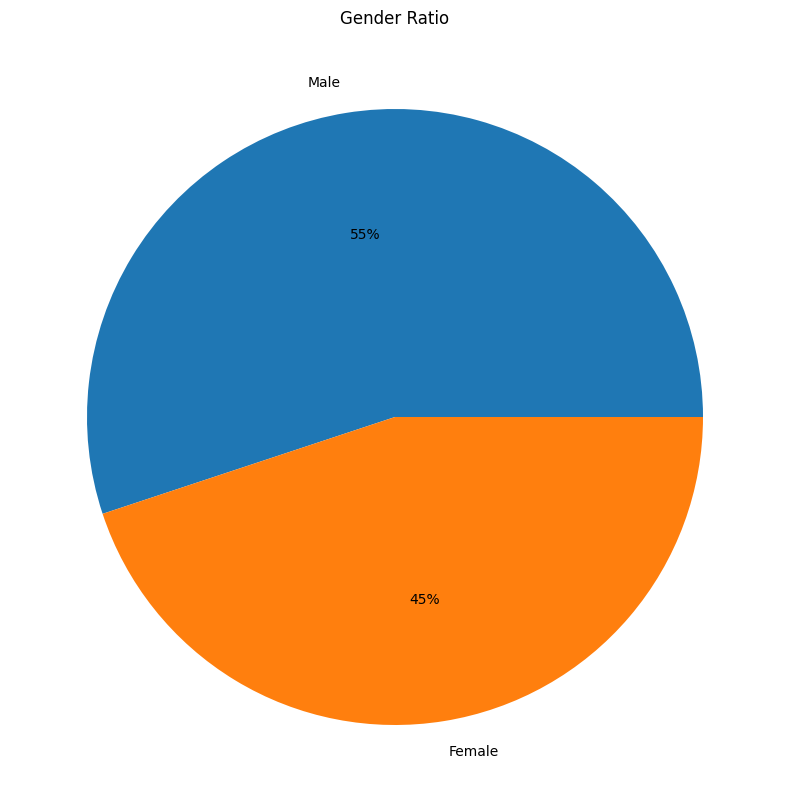

In [ ]:
# Gender Ratio with a pie chart:
plt.rc("figure",figsize=(10,10))
plt.pie(hr_data["Gender"].value_counts(),labels=hr_data["Gender"].value_counts().index,autopct="%1.0f%%")
plt.title("Gender Ratio")
plt.show()

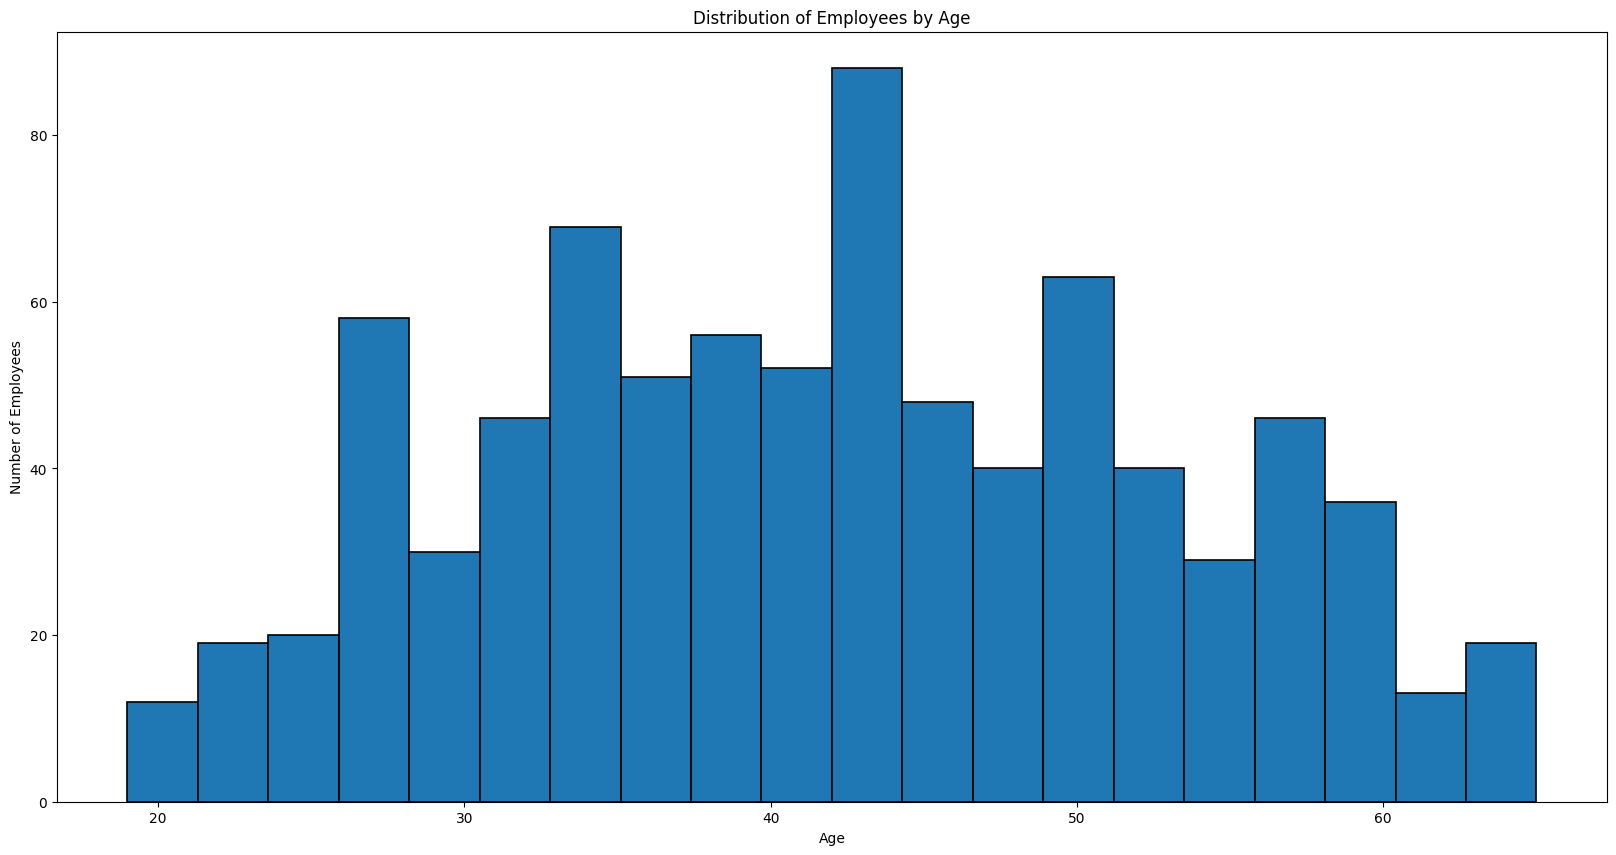

In [ ]:
# Distribution of Employees by Age
plt.rc("figure",figsize=(20,10))
hr_data["Age"].plot(kind="hist",bins=20,edgecolor="black",linewidth=1.2, xlabel="Age",ylabel="Number of Employees")
plt.title("Distribution of Employees by Age")
plt.show()

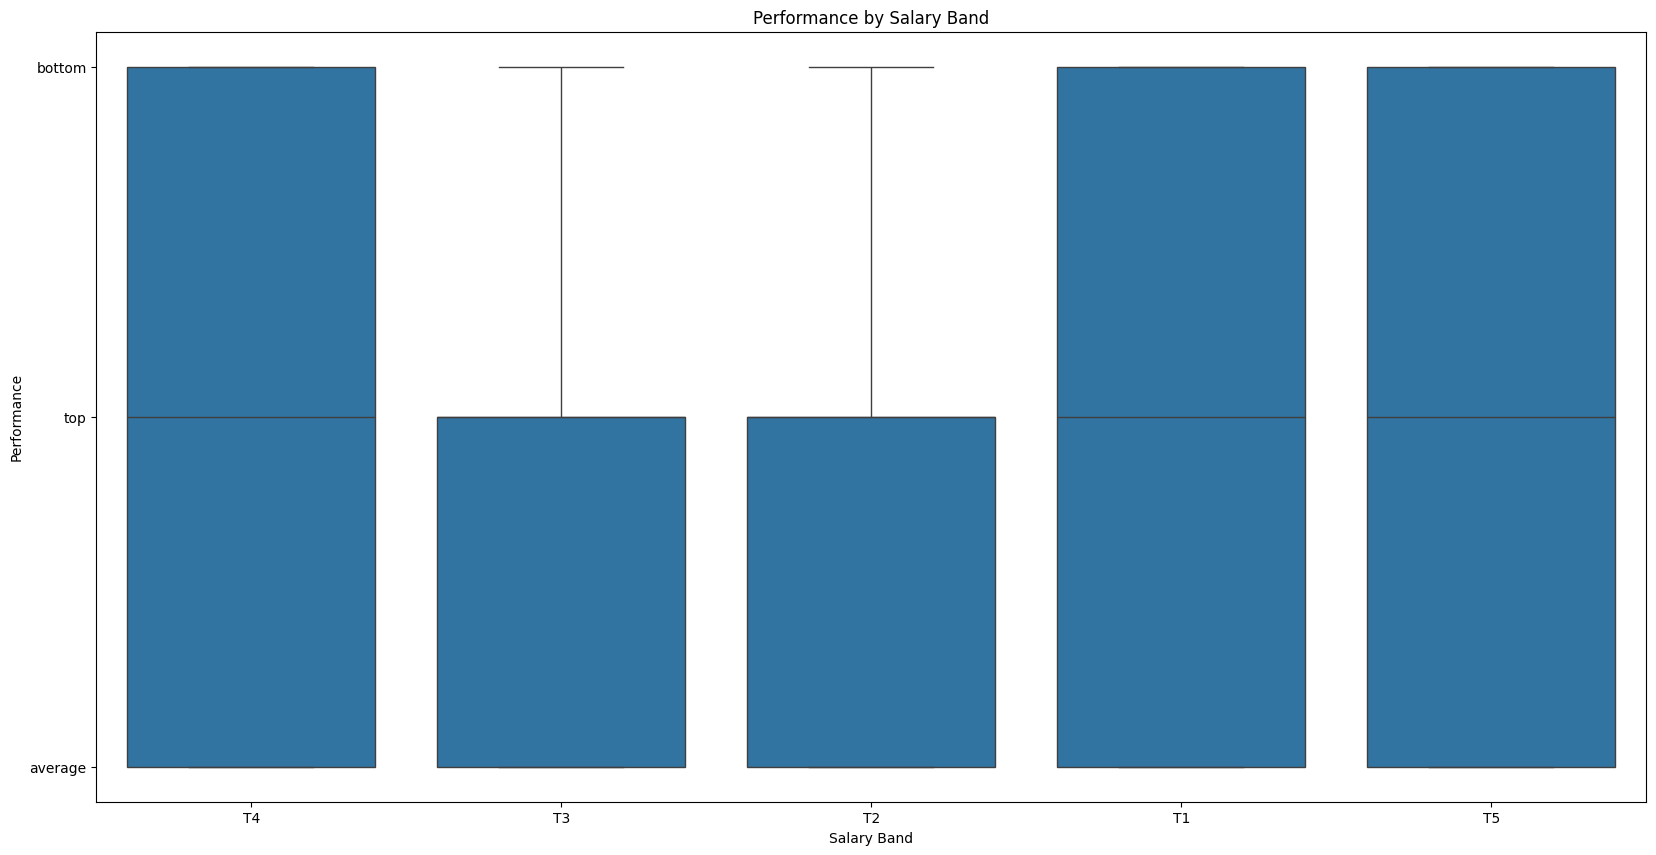

In [ ]:
# Performance by salary band (with seaborn):
sns.boxplot(x="Salary Band",y="Performance",data=hr_data)
plt.title("Performance by Salary Band")
plt.show()

Text(0.5, 1.0, 'Number of Employees by Department')

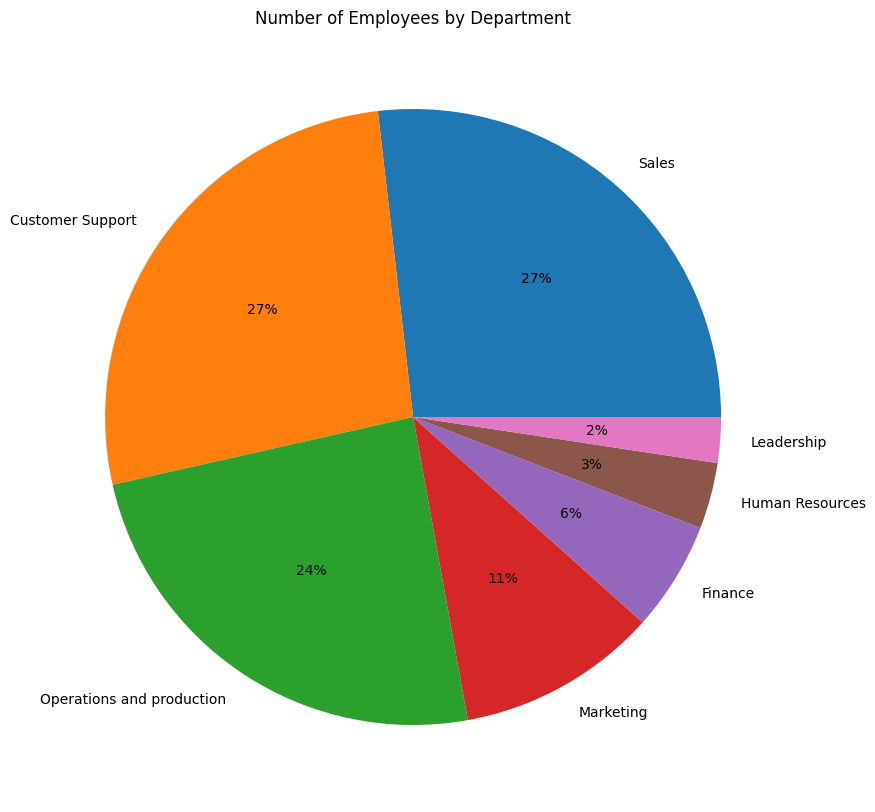

In [ ]:
# Number of employees by Department:
department_counts = hr_data["Department"].value_counts()
plt.pie(department_counts,labels=department_counts.index,autopct="%1.0f%%")
plt.title("Number of Employees by Department")